This code is from this web page:

http://www.nehalemlabs.net/prototype/blog/2014/02/24/an-introduction-to-the-metropolis-method-with-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats

In [8]:
def q(x, y):
#    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
#    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    g1 = stats.multivariate_normal.pdf((x,y), [-1,-1], [[1,-0.8],[-0.8,1]])
    g2 = stats.multivariate_normal.pdf((x,y), [1,2], [[1.5,0.6],[0.6,0.8]])
    return g1+g2

In [13]:
'''Metropolis Hastings'''
N = 120000
s = 10
r = np.zeros(2)
p = q(r[0], r[1])

In [17]:
samples = []
for i in range(N):
    rn = r + np.random.normal(size=2)
    pn = q(rn[0], rn[1])
    if pn >= p:
        p = pn
        r = rn
    else:
        u = np.random.rand()
        if u < pn/p:
            p = pn
            r = rn
    samples.append(r)
#    if i % s == 0:
#        samples.append(r)

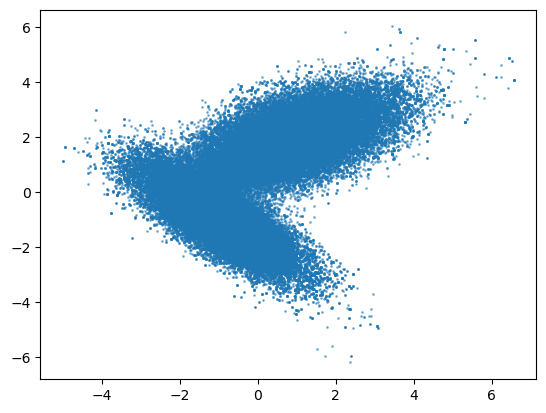

In [18]:
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)

In [19]:
samples.size

240000

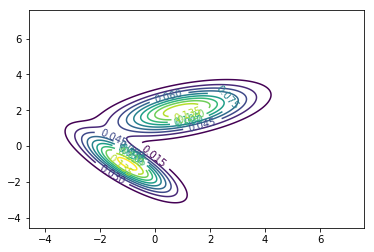

In [6]:
'''Plot target'''
dx = 0.01
x = np.arange(np.min(samples), np.max(samples), dx)
y = np.arange(np.min(samples), np.max(samples), dx)
X, Y = np.meshgrid(x, y)
Z = q(X, Y)
CS = plt.contour(X, Y, Z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()